In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [71]:
f = r'C:\Users\mattk\code\Mkt_Data\all_futures.csv'

In [72]:
df = pd.read_csv(f,index_col=0,parse_dates=[0])

In [76]:
df = df.resample('1B').last()

In [149]:
df.head()

,AEX,AUD,BOBL,BTP,BUND,CAC,COPPER,CORN,CRUDE_W,EDOLLAR,...,SMI,SOYBEAN,SP500,US10,US2,US20,US5,V2X,VIX,WHEAT
DATETIME,,,,,,,,,,,,,,,,,,,,,
1970-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
Np = 1 # number trials
T = 5 # years
#annualized PERCENTAGE figures

mu = .2
sigma = .2
dt = 1/365
N = round(T/dt)

S0 = 100

X = np.ones((N,Np))
X = np.random.normal((mu-sigma**2/2)*dt,sigma*np.sqrt(dt),X.shape)
X = np.cumsum(X,axis=0)
S = S0 * np.exp(X)

S = np.insert(S, 0, S0, axis=0)

In [133]:
df2 = pd.DataFrame(S,columns=['Price'])

In [145]:
def calc_macd(ser,s=8,l=24):
    '''
    input = series
    
    span = 2k-1
    '''
    x = ser.ewm(span=(2*s-1)).mean() - ser.ewm(span=(2*l-1)).mean()
    y = x/ser.diff().ewm(span=25).std()
    y = y/y.rolling(252).std()
    return y
        
        

In [146]:
df2['ma1'] = calc_macd(df2.Price)
df2['ma2'] = calc_macd(df2.Price,16,48)
df2['ma3'] = calc_macd(df2.Price,32,96)

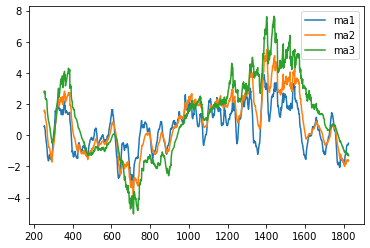

In [147]:
df2[['ma1','ma2','ma3']].plot()

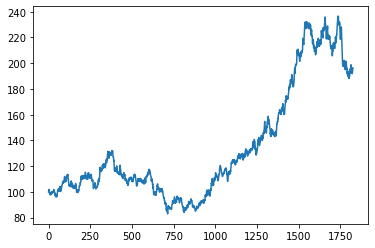

In [148]:
plt.plot(df2.Price)

In [151]:
df.diff().describe()

,AEX,AUD,BOBL,BTP,BUND,CAC,COPPER,CORN,CRUDE_W,EDOLLAR,...,SMI,SOYBEAN,SP500,US10,US2,US20,US5,V2X,VIX,WHEAT
count,2741.000000,8163.000000,3139.000000,2634.000000,3458.000000,2828.000000,6090.000000,11826.000000,7565.000000,8939.000000,...,1447.000000,9050.000000,5564.000000,9258.000000,4899.000000,10304.000000,7622.000000,1903.000000,3529.000000,11802.000000
mean,0.150224,0.000063,0.013554,0.032584,0.026951,1.249646,0.000113,-0.027123,0.003685,0.003071,...,3.320923,0.101288,0.373266,0.020400,0.005495,0.021866,0.013564,-0.008644,-0.013807,-0.037254
std,5.005429,0.005517,0.235026,0.740141,0.504951,57.042019,0.039928,5.036722,0.961487,0.075646,...,93.975442,10.728761,17.752696,0.436985,0.100209,0.750395,0.271751,0.736373,0.789690,7.941855
min,-53.250000,-0.073400,-1.340000,-7.460000,-3.050000,-595.500000,-0.275500,-40.000000,-10.090000,-0.760000,...,-1138.000000,-74.250000,-250.500000,-2.843750,-0.992188,-7.375000,-2.171875,-7.400000,-14.550000,-90.000000
25%,-2.050000,-0.002600,-0.100000,-0.290000,-0.240000,-24.000000,-0.013500,-2.000000,-0.280000,-0.035000,...,-38.000000,-4.250000,-7.000000,-0.218750,-0.039062,-0.375000,-0.132812,-0.300000,-0.300000,-3.250000
50%,0.300000,0.000200,0.010000,0.040000,0.020000,3.500000,0.000000,0.000000,0.020000,0.000000,...,5.000000,0.000000,1.000000,0.015630,0.000000,0.031100,0.007812,-0.050000,-0.050000,0.000000
75%,2.750000,0.003000,0.140000,0.390000,0.310000,29.000000,0.015000,1.750000,0.340000,0.040000,...,48.000000,4.500000,8.531250,0.273438,0.046875,0.437500,0.164062,0.200000,0.200000,3.000000
max,35.550000,0.033500,1.110000,8.770000,3.040000,341.500000,0.424000,40.000000,9.780000,1.180000,...,546.000000,70.000000,147.250000,4.390625,0.914062,12.687500,2.312500,12.150000,12.890000,90.000000


In [191]:
tgt_vol = 1

tst = df['BUND'].diff()
pos = 1
trail = tst.ewm(span=25).std()

out = pos*tst*tgt_vol/trail


In [198]:
out = pd.DataFrame(out)

In [214]:
out['sharpe'] = out.rolling(252,min_periods=1).mean()*np.sqrt(252)/out.rolling(252,min_periods=1).std()

In [220]:
out.sharpe.dropna()

DATETIME
2006-09-06   -85.825478
2006-09-07    -9.699912
2006-09-08    -5.977332
2006-09-11    -7.080105
2006-09-12    -7.305193
                ...    
2020-06-24     0.593846
2020-06-25     0.662993
2020-06-26     0.796123
2020-06-29     0.808770
2020-06-30     1.016201
Freq: B, Name: sharpe, Length: 3605, dtype: float64

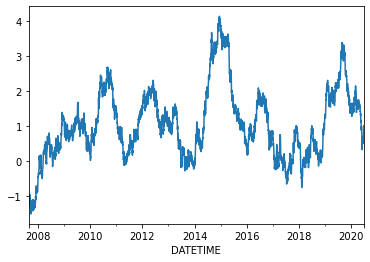

In [224]:
out.sharpe.dropna()[252:].plot()